### 보험료 예측 선형회귀 모델

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [16]:
df = pd.read_csv('C:/githome/hipython_rep/data1/premium.csv')

In [17]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.isna().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
target_col=df.columns[-1]
target_col

'charges'

In [20]:
X=df.drop(target_col,axis=1)
y=df[target_col]

In [21]:
X = pd.get_dummies(X)

In [22]:
X = X.fillna(X.mean(numeric_only=True)).fillna(0)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [24]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=lr.predict(X_test)

In [27]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)


In [28]:
print(f"평균제곱오차(MSE): {mse:.2f}")
print(f'RMSE: {rmse:.2f}')
print(f"R^2: {r2:.2f}")

평균제곱오차(MSE): 33627022.07
RMSE: 5798.88
R^2: 0.78


In [31]:
# R² (결정계수, 회귀 정확도)
r2_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f"각 fold R^2 점수: {r2_scores}")
print(f"평균 R^2(정확도): {np.mean(r2_scores):.4f}")

# RMSE (root mean squared error)
rmse_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -rmse_scores  # 음수이므로 양수로 변환
print(f"각 fold RMSE: {rmse_scores}")
print(f"평균 RMSE: {np.mean(rmse_scores):.2f}")

각 fold R^2 점수: [0.75975542 0.70548863 0.77540897 0.73263652 0.75561818]
평균 R^2(정확도): 0.7458
각 fold RMSE: [6110.10804354 6184.85112645 5741.29061605 6299.99418171 6092.52902859]
평균 RMSE: 6085.75


### RandomForestRegressor()

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
y_pred = rf.predict(X_test)

In [100]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [101]:
print(f"평균제곱오차(MSE): {mse:.2f}")
print(f'RMSE: {rmse:.4f}')
print(f"R^2: {r2:.4f}")

평균제곱오차(MSE): 21692451.80
RMSE: 4657.5156
R^2: 0.8603


In [103]:
# RMSE
rmse_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -rmse_scores  # 음수니까 양수로 바꿔줌
print(f"각 fold RMSE: {rmse_scores}")
print(f"평균 RMSE: {np.mean(rmse_scores):.2f}")

# R² (정확도)
r2_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"각 fold R^2 점수: {r2_scores}")
print(f"평균 R^2(정확도): {np.mean(r2_scores):.4f}")



각 fold RMSE: [4759.69317606 5480.3843555  4604.22713426 5032.7883564  4732.48471064]
평균 RMSE: 4921.92
각 fold R^2 점수: [0.8542147  0.76875859 0.85556022 0.82937639 0.85254751]
평균 R^2(정확도): 0.8321


In [60]:
result = pd.DataFrame({'실제보험료': y_test,   '예측보험료': y_pred})
print(result.head(10))

            실제보험료         예측보험료
764    9095.06825   9678.654178
887    5272.17580   5382.360619
890   29330.98315  28135.906360
1293   9301.89355  12135.717519
259   33750.29180  34886.800965
1312   4536.25900   8275.972053
899    2117.33885   2065.212777
752   14210.53595  14262.325116
1286   3732.62510   6005.025874
707   10264.44210  11071.876575


## 다항회귀 모델

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [125]:
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42)
model_poly=Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('Linear',LinearRegression())]
)
model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('Linear', LinearRegression())])

In [126]:
pred_poly=model_poly.predict(X_test)
mse=mean_squared_error(y_test, pred_poly)
rmse=np.sqrt

In [128]:
r2_score(y_test, pred_poly)

np.float64(0.8650403311584188)

In [130]:
### 2차~5차 다항회귀 시물레이션

results=[]

for degree in range(1,5):
  model_poly=Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear',LinearRegression())]
  )
  model_poly.fit(X_train, y_train)
  pred_poly=model_poly.predict(X_test)
  mse=mean_squared_error(y_test, pred_poly)
  rmse=np.sqrt(mse)
  r2=r2_score(y_test,pred_poly)

  results.append({'degree':degree,
                'MSE':mse,
                'RMSE':rmse,
                'R2':r2})


pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,3.362702e+07,5798.881105,0.783399
1,2,2.095232e+07,4577.370139,0.865040
2,3,2.373135e+07,4871.483362,0.847140
3,4,3.917813e+07,6259.243620,0.747643


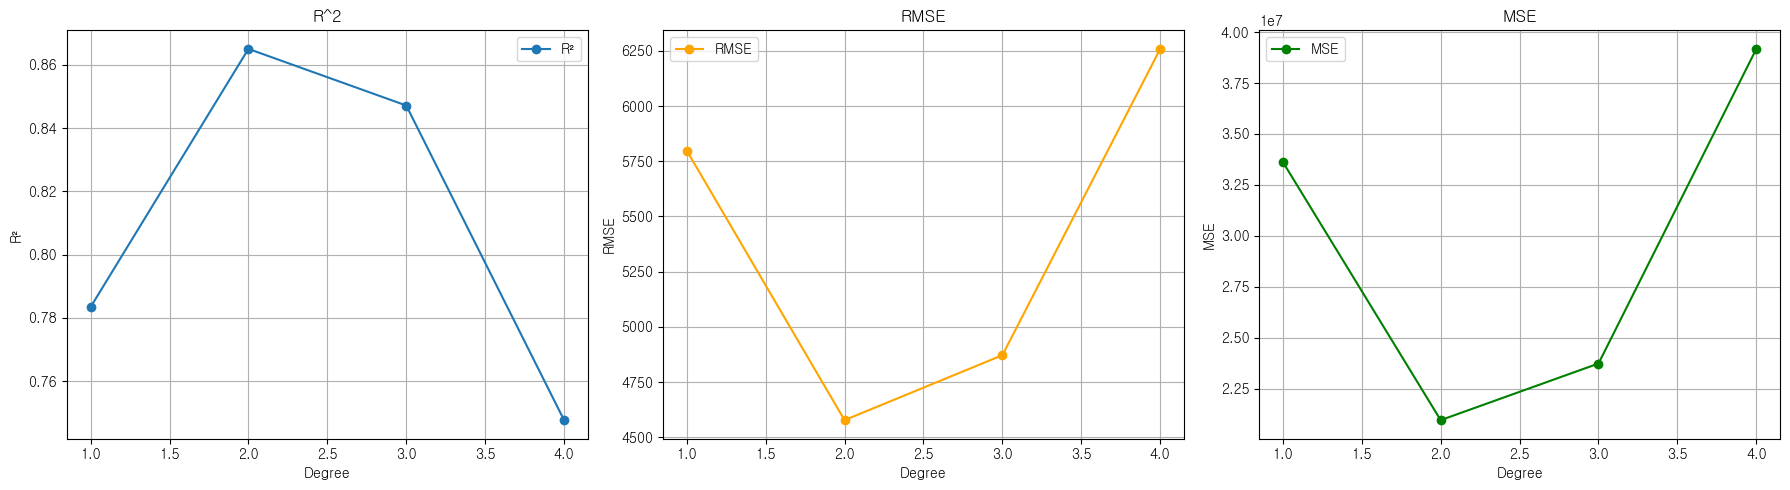

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# results 리스트가 이미 있다면 DataFrame으로 변환
df_results = pd.DataFrame(results)

# degree별로 R2, RMSE, MSE 그래프
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R2 그래프
axes[0].plot(df_results['degree'], df_results['R2'], marker='o', label='R²')
axes[0].set_title('R^2')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('R²')
axes[0].grid(True)
axes[0].legend()

# RMSE 그래프
axes[1].plot(df_results['degree'], df_results['RMSE'], marker='o', color='orange', label='RMSE')
axes[1].set_title('RMSE')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('RMSE')
axes[1].grid(True)
axes[1].legend()

# MSE 그래프
axes[2].plot(df_results['degree'], df_results['MSE'], marker='o', color='green', label='MSE')
axes[2].set_title('MSE')
axes[2].set_xlabel('Degree')
axes[2].set_ylabel('MSE')
axes[2].grid(True)
axes[2].legend()

plt.rc('font', family='gulim') 
plt.tight_layout()
plt.show()

### 의미와 관계 정리
#### 1. MSE(Mean Squared Error): 평균제곱오차
\- 낮을수록 좋다

\- 예측값이 실제값에서 평균적으로 얼마나 떨어져 있는지(오차의 제곱)

\- 크면 예측이 많이 빗나감

\- 단점: 이상치에 민감

#### 2. RMSE(Root Mean Squared Error): 평균제곱근오차
\- 낮을수록 좋다

\- MSE의 제곱근 (단위가 y값과 동일)

\- 해석이 쉬움 (예: RMSE=4,577이면, 예측이 평균적으로 실제값에서 4,577만큼 떨어져 있음)

#### 3. R²(결정계수): 설명력
\- 1에 가까울수록 좋다

\- 0~1 사이(드물게 0 이하 가능)

\- 예측 모델이 실제값의 분산을 얼마나 설명하는지 

\- 높으면 예측 모델이 데이터를 잘 설명

In [ ]:
import pandas as pd
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('C:\githome\hipython_rep\data1\premium.csv')

# 2. X, y 분리 (컬럼명에 따라 조정 필요)
target_col=df.columns[-1]
X = df.drop(target_col, axis=1)
y = df[target_col]


# 범주형 변수 인코딩 (get_dummies 권장)
X = pd.get_dummies(X)

# 결측치 처리 등 추가 전처리
X = X.fillna(X.mean(numeric_only=True)).fillna(0)

# 3. 학습/테스트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [41]:
# 4. 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# 5. 다항 특성 생성 (2차 다항 예시)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
# 6. 각 모델 import
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# 7. 다항회귀
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
pred_poly = model_poly.predict(X_test_poly)

# 8. 릿지회귀
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
pred_ridge = ridge.predict(X_test_poly)

# 9. 라쏘회귀
lasso = Lasso(alpha=0.01, max_iter=5000)
lasso.fit(X_train_poly, y_train)
pred_lasso = lasso.predict(X_test_poly)

# 10. 엘라스틱넷회귀
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000)
enet.fit(X_train_poly, y_train)
enet_pred = enet.predict(X_test_poly)


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.547e+08, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


In [46]:
# 11. 결과 정리
from sklearn.metrics import mean_squared_error, r2_score

results = pd.DataFrame({
    '모델': ['다항회귀', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
    'MSE': [
        mean_squared_error(y_test, pred_poly),
        mean_squared_error(y_test, pred_ridge),
        mean_squared_error(y_test, pred_lasso),
        mean_squared_error(y_test, enet_pred)
    ],
    'R2': [
        r2_score(y_test, pred_poly),
        r2_score(y_test, pred_ridge),
        r2_score(y_test, pred_lasso),
        r2_score(y_test, enet_pred)
    ]
})
results

,모델,MSE,R2
0,다항회귀,2.114970e+07,0.863769
1,릿지회귀,2.095306e+07,0.865036
2,라쏘회귀,2.095225e+07,0.865041
3,엘라스틱넷회귀,2.095677e+07,0.865012


## 교차검증

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.metrics import mean_squared_error

# 다항회귀 MSE (전체 데이터)
poly_model.fit(X, y)
mse_poly = mean_squared_error(y, poly_model.predict(X))

# 릿지회귀 MSE
mse_ridge = mean_squared_error(y, ridge_grid.best_estimator_.predict(X))

# 라쏘회귀 MSE
mse_lasso = mean_squared_error(y, lasso_grid.best_estimator_.predict(X))

# 엘라스틱넷회귀 MSE
mse_enet = mean_squared_error(y, enet_grid.best_estimator_.predict(X))

results = pd.DataFrame({
    '모델': ['다항회귀', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
    'MSE': [mse_poly, mse_ridge, mse_lasso, mse_enet],
    'R2': [
        np.mean(poly_scores),
        ridge_best_r2,
        lasso_best_r2,
        enet_best_r2
    ]
})

results

,모델,MSE,R2
0,다항회귀,3.667301e+07,0.745782
1,릿지회귀,3.667350e+07,0.745788
2,라쏘회귀,3.667597e+07,0.745856
3,엘라스틱넷회귀,3.667389e+07,0.745789
